In [2]:
from qat.lang.AQASM import QRoutine, Program, PH, H
import math

In [3]:
def QFT(n):
    # If there is only one qbit, then the QFT is a simple H gate
    qft_routine = QRoutine()
    if(n == 1):
        # Gates are applied using the .apply method. 
        # Arguments are specified by indexes.
        # 0 means that the H gate must be applied 
        # on the first argument passed to the routine
        qft_routine.apply(H, 0)
        return qft_routine

    # Wires can also be allocated (simpler to manage)
    wires = qft_routine.new_wires(n)
    qft_routine.apply(H, wires[0])
    for i in range(1, n):
        qft_routine.apply(PH(math.pi/pow(2.,i)).ctrl(), wires[0], wires[i])    
    qft_routine.apply(QFT(n-1), wires[1:])
    return qft_routine

In [4]:
def IQFT(n):
    return QFT(n).dag()

In [5]:
prog = Program()
rout_iqft_10 = IQFT(10)
reg = prog.qalloc(10)
prog.apply(rout_iqft_10, reg)

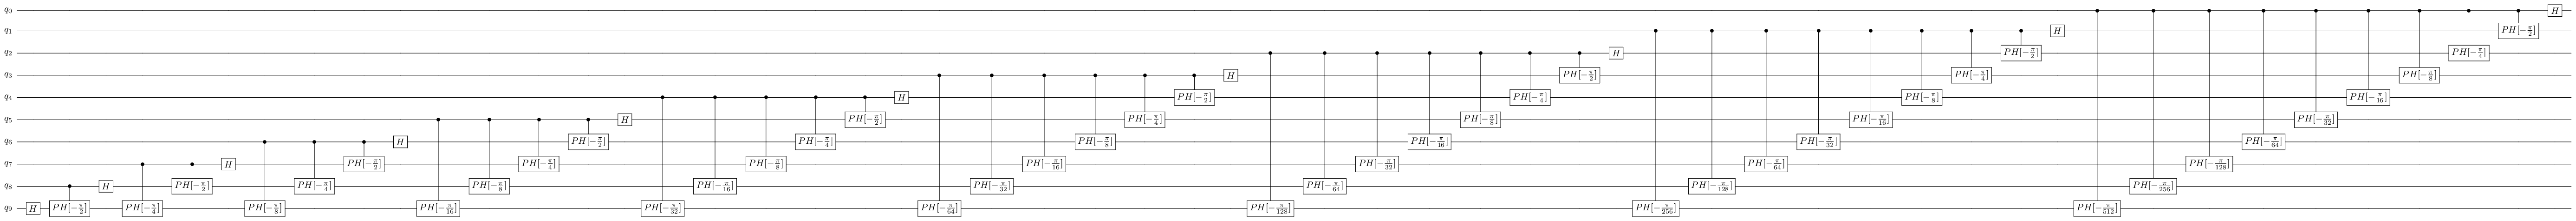

In [6]:
circ = prog.to_circ()
%qatdisplay circ